In [88]:
import pandas as pd
import os

In [89]:
#import
os.makedirs('Data/',exist_ok=True) 
os.listdir('Data')

['Listings.csv',
 'Listings_data_dictionary.csv',
 'Reviews.csv',
 'Reviews_data_dictionary.csv']

In [90]:
listings = pd.read_csv('Data/Listings.csv', encoding='ISO-8859-1',low_memory= False)
reviews=pd.read_csv('Data/Reviews.csv', encoding='ISO-8859-1',low_memory= False)

In [91]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [92]:
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [93]:
listings['host_since']= pd.to_datetime(listings['host_since']
)
listings['host_since'].head()

0   2011-12-03
1   2013-11-29
2   2014-07-31
3   2013-12-17
4   2014-12-14
Name: host_since, dtype: datetime64[ns]

In [94]:
listings.dtypes

listing_id                              int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                      object
host_total_listings_count             float64
host_has_profile_pic                   object
host_identity_verified                 object
neighbourhood                          object
district                               object
city                                   object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
amenities                         

In [95]:
paris= listings[listings['city'] == 'Paris']
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919 non-null  float64       
 8   host_is_superhost            64657 non-null  object        
 9   host_total_listings_count    64657 non-null  float64       
 10  host_has_profile_pic         64657 non-null  object        
 11  host_identity_verified       64657 non-n

In [96]:
paris.isna().sum()

listing_id                         0
name                              63
host_id                            0
host_since                        33
host_location                    168
host_response_time             41344
host_response_rate             41344
host_acceptance_rate           32771
host_is_superhost                 33
host_total_listings_count         33
host_has_profile_pic              33
host_identity_verified            33
neighbourhood                      0
district                       64690
city                               0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bedrooms                       13404
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
review_scores_rating           16654
review_scores_accuracy         16701
r

In [97]:
keepers= ['host_since','neighbourhood','city','price', 'accommodates']
df=paris[keepers]
df.head()

,host_since,neighbourhood,city,price,accommodates
0,2011-12-03,Buttes-Montmartre,Paris,53,2
1,2013-11-29,Buttes-Montmartre,Paris,120,2
2,2014-07-31,Elysee,Paris,89,2
3,2013-12-17,Vaugirard,Paris,58,2
4,2014-12-14,Passy,Paris,60,2


In [98]:
df.isna().sum()

host_since       33
neighbourhood     0
city              0
price             0
accommodates      0
dtype: int64

In [99]:
df=df.dropna()
df.isna().sum()

host_since       0
neighbourhood    0
city             0
price            0
accommodates     0
dtype: int64

In [100]:
df.describe()

,price,accommodates
count,64657.000000,64657.000000
mean,113.104614,3.037877
std,214.479626,1.588382
min,0.000000,0.000000
25%,59.000000,2.000000
50%,80.000000,2.000000
75%,120.000000,4.000000
max,12000.000000,16.000000


PT2 -Visuals

In [101]:
paris_listings_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Sort the result by the mean price in ascending order (low to high)
paris_listings_neighbourhood_sorted = paris_listings_neighbourhood.sort_values(by='price', ascending=True)
paris_listings_neighbourhood_sorted.head()

,neighbourhood,price
10,Menilmontant,74.911561
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.222069
17,Reuilly,89.058402
16,Popincourt,90.518955


In [102]:
most_expensive_neighbourhood = df.groupby('neighbourhood')['price'].mean().idxmax()
df_most_expensive = df[df['neighbourhood'] == most_expensive_neighbourhood]
paris_listings_accommodations = df_most_expensive.groupby('accommodates')['price'].mean().reset_index()
paris_listings_accommodations_sorted = paris_listings_accommodations.sort_values(by='price', ascending=True)
paris_listings_accommodations_sorted.head()

,accommodates,price
0,0,0.000000
1,1,79.522222
3,3,152.828767
2,2,155.103352
4,4,212.096070


In [103]:
df.isna().sum()

host_since       0
neighbourhood    0
city             0
price            0
accommodates     0
dtype: int64

In [104]:
df.describe()

,price,accommodates
count,64657.000000,64657.000000
mean,113.104614,3.037877
std,214.479626,1.588382
min,0.000000,0.000000
25%,59.000000,2.000000
50%,80.000000,2.000000
75%,120.000000,4.000000
max,12000.000000,16.000000


pt 3 - Visuals

In [112]:
df1= df.sort_values('price', ascending=True)
df1_sortie= df1.sort_values('price', ascending=True)

In [118]:
df1_sortie['price'].head()

203265    0
208872    0
208875    0
208876    0
208877    0
Name: price, dtype: int64

In [117]:
df1_sortie['price'].describe()

count    64657.000000
mean       113.104614
std        214.479626
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max      12000.000000
Name: price, dtype: float64

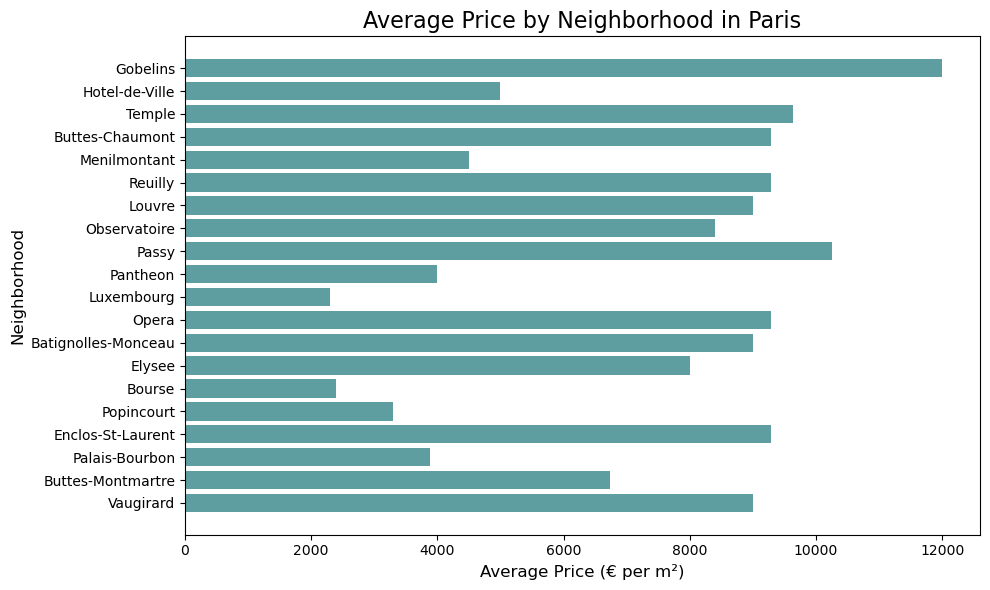

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(df1_sortie['neighbourhood'], df1_sortie['price'], color='cadetblue')

# Add title and labels
plt.title('Average Price by Neighborhood in Paris', fontsize=16)
plt.xlabel('Average Price (€ per m²)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

^ ascending df wip